In [54]:
import numpy as np
from sklearn import datasets, metrics
import matplotlib.pyplot as plt
from numpy.linalg import inv,pinv,LinAlgError
# Set random seed for reproducibility
np.random.seed(0)
# Generate random input features X (100 samples)
X=3*np.random.rand(100,1)
# Generate target values y based on a linear relationship with noise
# y = 5 + 2 * X + noise
y=5+2*X+np.random.randn(100,1)

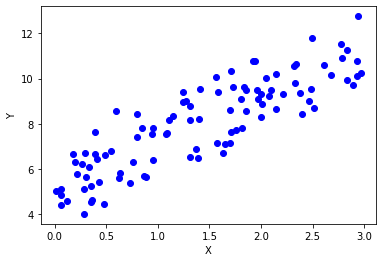

In [25]:
plt.plot(X,y,"bo")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [26]:
X_p=np.c_[np.ones((100,1)),X]

In [27]:
X_p.shape

(100, 2)

In [28]:
theta_hat=np.linalg.inv(X_p.T.dot(X_p)).dot(X_p.T).dot(y)

In [29]:
theta_hat

array([[5.22215108],
       [1.97897834]])

In [30]:
X_test=np.array([[0],[12]])
X_test_p=np.c_[np.ones((2,1)),X_test]
y_predict=X_test_p.dot(theta_hat)
y_predict

array([[ 5.22215108],
       [28.96989116]])

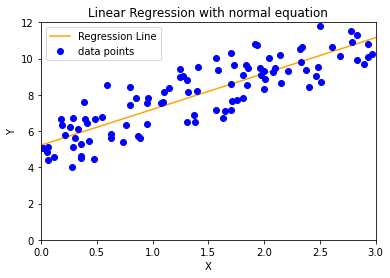

In [41]:
plt.plot(X_test,y_predict,c="orange",label="Regression Line")
plt.plot(X,y,"bo",label="data points")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression with normal equation")
plt.xlim(0,3)
plt.ylim(0,12)
plt.show()

In [74]:
#Multiple Linear Regression with Normal equation
X,y=datasets.load_boston(return_X_y=True)
X_train_temp1=X[0:400,:]
print(X_train_temp1)
X_train=np.zeros((X_train_temp1.shape[0],X_train_temp1.shape[1]+1))
X_train[:,0]=np.ones((X_train_temp1.shape[0]))
X_train[:,1:]=X_train_temp1
y_train=y[0:400]
#test
X_test_temp1=X[400:506,:]
X_test=np.zeros((X_test_temp1.shape[0],X_test_temp1.shape[1]+1))
X_test[:,0]=np.ones((X_test_temp1.shape[0]))
X_test[:,1:]=X_test_temp1
y_test=y[400:506]


[[6.32000e-03 1.80000e+01 2.31000e+00 ... 1.53000e+01 3.96900e+02
  4.98000e+00]
 [2.73100e-02 0.00000e+00 7.07000e+00 ... 1.78000e+01 3.96900e+02
  9.14000e+00]
 [2.72900e-02 0.00000e+00 7.07000e+00 ... 1.78000e+01 3.92830e+02
  4.03000e+00]
 ...
 [7.67202e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.93100e+02
  1.99200e+01]
 [3.83518e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.96900e+02
  3.05900e+01]
 [9.91655e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.38160e+02
  2.99700e+01]]


In [75]:
from sklearn import metrics
theta=np.zeros(X_train.shape[1])
try :
    XTXi=inv(np.dot(X_train.T,X_train))
except LinAlgError:
    XTXi=pinv(np.dot(X_train.T,X_train))

In [76]:
XTy=np.dot(X_train.T,y_train)

In [77]:
theta=np.dot(XTXi,XTy)

In [78]:
print(theta)

[ 2.86725996e+01 -1.91246374e-01  4.42289967e-02  5.52207977e-02
  1.71631351e+00 -1.49957220e+01  4.88773025e+00  2.60921031e-03
 -1.29480799e+00  4.84787214e-01 -1.54006673e-02 -8.08795026e-01
 -1.29230427e-03 -5.17953791e-01]


In [79]:
print(theta.shape)

(14,)


In [80]:
predictions=np.dot(theta,X_test.T)

In [81]:
print("MAE",metrics.mean_absolute_error(y_true=y_test,y_pred=predictions))
print("MSE:",metrics.mean_squared_error(y_true=y_test,y_pred=predictions))

MAE 5.142232214464412
MSE: 37.89377859958787
